# CNN AlexNet
- https://towardsdatascience.com/implementing-alexnet-cnn-architecture-using-tensorflow-2-0-and-keras-2113e090ad98

## Loading and preprocessing the data

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


2021-09-14 19:21:15.515219: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set


In [3]:
mnist = tf.keras.datasets.mnist

(X_train_, y_train), (X_test_, y_test) = mnist.load_data()
X_train_, X_test_ = X_train_.astype(np.float32) / 255.0, X_test_.astype(np.float32)/ 255.0

In [4]:
# Add another dimension
X_train = X_train_[..., np.newaxis]
X_test = X_test_[..., np.newaxis]
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
# Reduce dimension size
np.random.seed(0) 

REDUCE_DIM = 2000
idx = np.random.permutation(REDUCE_DIM)

X_train = X_train[idx]
y_train = y_train[idx]
X_test = X_test[idx]
y_test = y_test[idx]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2000, 28, 28, 1)
(2000, 28, 28, 1)
(2000,)
(2000,)


In [6]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(1,1), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

2021-09-14 19:21:15.895594: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-14 19:21:15.896272: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 18, 18, 96)        11712     
_________________________________________________________________
batch_normalization (BatchNo (None, 18, 18, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 96)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 256)         221440    
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 256)         1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 384)         8

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) # same as `tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')`


In [9]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20


2021-09-14 19:21:16.241799: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-14 19:21:16.259183: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 1999965000 Hz


57/57 [==============================] - 18s 295ms/step - loss: 3.6792 - accuracy: 0.4076 - val_loss: 4.0897 - val_accuracy: 0.1050
Epoch 2/20
57/57 [==============================] - 19s 335ms/step - loss: 0.6239 - accuracy: 0.8277 - val_loss: 4.5587 - val_accuracy: 0.1900
Epoch 3/20
57/57 [==============================] - 19s 326ms/step - loss: 0.3184 - accuracy: 0.9162 - val_loss: 8.6230 - val_accuracy: 0.1000
Epoch 4/20
57/57 [==============================] - 19s 327ms/step - loss: 0.2659 - accuracy: 0.9267 - val_loss: 4.3841 - val_accuracy: 0.2600
Epoch 5/20
57/57 [==============================] - 19s 328ms/step - loss: 0.3396 - accuracy: 0.9030 - val_loss: 1.9157 - val_accuracy: 0.5900
Epoch 6/20
57/57 [==============================] - 19s 329ms/step - loss: 0.1951 - accuracy: 0.9456 - val_loss: 1.6637 - val_accuracy: 0.5650
Epoch 7/20
57/57 [==============================] - 19s 338ms/step - loss: 0.2050 - accuracy: 0.9488 - val_loss: 0.8967 - val_accuracy: 0.7650
Epoch 8/20

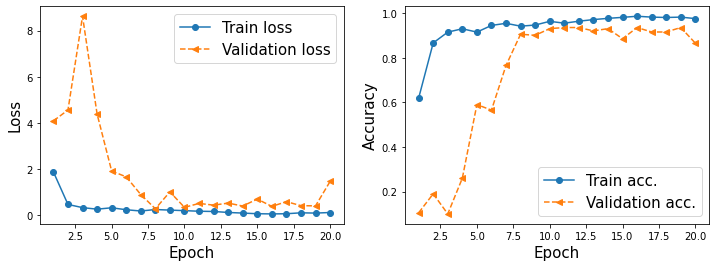

In [14]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

#plt.savefig('figures/15_12.png', dpi=300)
plt.show()

In [17]:
test_results = model.evaluate(X_test, y_test)
print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))

63/63 [==============================] - 7s 104ms/step - loss: 1.1923 - accuracy: 0.8705

Test Acc. 87.05%


In [18]:
# Find misclassification
y_pred_tf = model(X_test)
y_pred_tf.numpy().shape

y_pred = tf.math.argmax(y_pred_tf,axis=1).numpy()
print(y_pred.shape)
print(y_test.shape)

loc = y_pred != y_test
print(f'Missclassification = {loc.sum()}')

(2000,)
(2000,)
Missclassification = 259


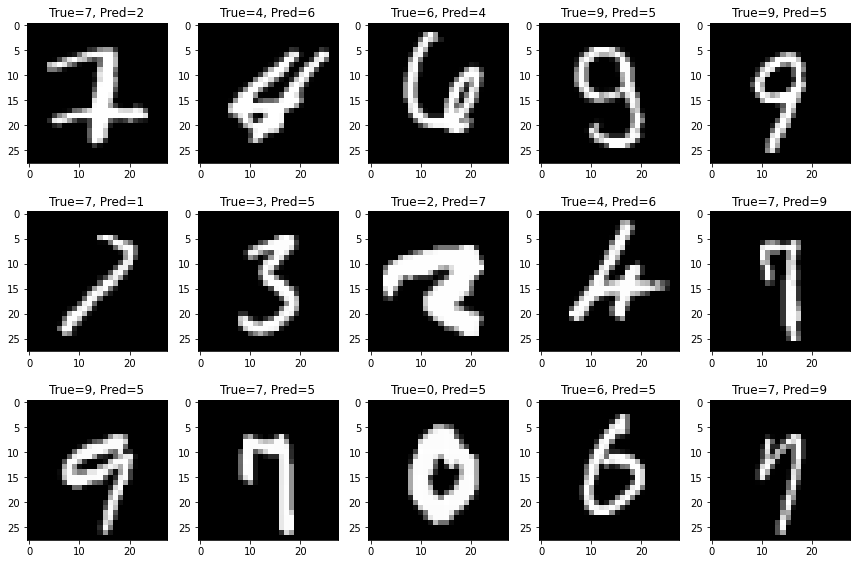

In [19]:
fig, axes2D = plt.subplots(3,5, figsize=(12,8))
axes = list(itertools.chain.from_iterable(axes2D)) # Flatten 2D list
X_test_miss = X_test[loc]
y_test_miss = y_test[loc]
y_pred_miss = y_pred[loc]
for idx, ax in enumerate(axes):
    ax.imshow(X_test_miss[idx], cmap='gray')
    ax.set_title(f'True={y_test_miss[idx]}, Pred={y_pred_miss[idx]}')
fig.tight_layout()
plt.show()